# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
print(len(cities))

627


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Dimension Lists To Store Data
city_list = [None]*len(cities)
cloudiness_list = [None]*len(cities)
country_list = [None]*len(cities)
date_list = [None]*len(cities)
humidity_list = [None]*len(cities)
lat_list = [None]*len(cities)
lng_list = [None]*len(cities)
max_temp_list = [None]*len(cities)
wind_speed_list = [None]*len(cities)

city_index = 0
url = "http://api.openweathermap.org/data/2.5/weather?"

#Go through list of cities
for city in cities:
    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city
    #Make Request
    weather_response = requests.get(query_url)
    #If Request Successful
    if weather_response.status_code == 200:
        print(f'Found city {city}, index = {city_index}')
        #Convert Response to Json
        weather_json = weather_response.json()
        #Filter out Humidity bugs
        if weather_json['main']['humidity'] <= 100:
            city_list[city_index] = city
            cloudiness_list[city_index] = weather_json['clouds']['all']
            country_list[city_index] = weather_json['sys']['country']
            date_list[city_index] = datetime.fromtimestamp(weather_json['dt'])
            humidity_list[city_index] = weather_json['main']['humidity']
            lat_list[city_index] = weather_json['coord']['lat']
            lng_list[city_index] = weather_json['coord']['lon']
            max_temp_list[city_index] = (weather_json['main']['temp_max']-273.15)*(9/5)+32
            wind_speed_list[city_index] = weather_json['wind']['speed']*2.23694
            city_index += 1
        else:
            print('City has data bug. Skipping...')                    
    else:
        print('City not found. Skipping...')
    
print('Done')
TodayDate = datetime.today().strftime('%Y-%m-%d')

Found city kaeo, index = 0
Found city port alfred, index = 1
Found city praia da vitoria, index = 2
Found city khatanga, index = 3
Found city rovaniemi, index = 4
Found city jamestown, index = 5
Found city tuktoyaktuk, index = 6
Found city atherton, index = 7
Found city kodiak, index = 8
Found city alofi, index = 9
Found city atuona, index = 10
Found city dikson, index = 11
Found city harper, index = 12
Found city ginir, index = 13
Found city shimoda, index = 14
Found city whitehorse, index = 15
Found city hasaki, index = 16
Found city klaksvik, index = 17
Found city new norfolk, index = 18
Found city luderitz, index = 19
Found city bluff, index = 20
Found city vaini, index = 21
Found city busselton, index = 22
Found city carnarvon, index = 23
Found city bethel, index = 24
Found city saskylakh, index = 25
Found city chapais, index = 26
Found city batagay, index = 27
Found city bredasdorp, index = 28
Found city ushuaia, index = 29
Found city bambous virieux, index = 30
Found city uperna

Found city hsinchu, index = 227
Found city clyde river, index = 228
Found city porto novo, index = 229
City not found. Skipping...
Found city abbeville, index = 230
Found city arraial do cabo, index = 231
Found city veriora, index = 232
Found city koubia, index = 233
Found city raudeberg, index = 234
City not found. Skipping...
Found city aklavik, index = 235
Found city eirunepe, index = 236
Found city rudnogorsk, index = 237
City not found. Skipping...
Found city vila franca do campo, index = 238
Found city aginskoye, index = 239
City not found. Skipping...
Found city ilulissat, index = 240
Found city gat, index = 241
Found city murupara, index = 242
Found city carmen, index = 243
Found city neyvo-shaytanskiy, index = 244
Found city baker city, index = 245
Found city kirensk, index = 246
Found city nome, index = 247
Found city veraval, index = 248
Found city takoradi, index = 249
Found city kamenka, index = 250
Found city kavieng, index = 251
Found city bellefontaine, index = 252
Foun

Found city chumikan, index = 449
Found city buchanan, index = 450
Found city limon, index = 451
Found city lingao, index = 452
Found city kodar, index = 453
Found city camapua, index = 454
Found city soubre, index = 455
Found city biak, index = 456
Found city shahr-e babak, index = 457
Found city erzin, index = 458
Found city pinsk, index = 459
Found city malinovskiy, index = 460
Found city belaya gora, index = 461
Found city san andres, index = 462
Found city namatanai, index = 463
Found city barra do garcas, index = 464
Found city batesville, index = 465
Found city acari, index = 466
Found city ambilobe, index = 467
Found city malanje, index = 468
Found city varhaug, index = 469
Found city chegdomyn, index = 470
Found city tokmak, index = 471
Found city buala, index = 472
Found city magnaga, index = 473
Found city macultepec, index = 474
Found city minna, index = 475
Found city stokmarknes, index = 476
Found city dicamay, index = 477
Found city severo-yeniseyskiy, index = 478
Found c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data_dict = {'City':city_list,
                     'Cloudiness':cloudiness_list,
                     'Country':country_list,
                     'Date':date_list,
                     'Humidity':humidity_list,
                     'Lat':lat_list,
                     'Lng':lng_list,
                     'Max Temp':max_temp_list,
                     'Wind Speed':wind_speed_list                     
                    }
weather_data_df = pd.DataFrame(weather_data_dict)
weather_data_df = weather_data_df.dropna()
weather_data_df.to_csv(output_data_file)
weather_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kaeo,100.0,NZ,2019-08-24 14:26:31,100.0,-35.10,173.78,51.0080,1.006623
1,port alfred,0.0,ZA,2019-08-24 14:26:31,78.0,-33.59,26.89,64.0040,1.990877
2,praia da vitoria,20.0,PT,2019-08-24 14:26:32,69.0,38.73,-27.07,73.4000,12.862405
3,khatanga,69.0,RU,2019-08-24 14:26:32,93.0,71.98,102.47,50.3528,7.806921
4,rovaniemi,20.0,FI,2019-08-24 14:26:32,76.0,66.50,25.72,51.8000,5.816044
5,jamestown,0.0,AU,2019-08-24 14:22:01,95.0,-33.21,138.60,38.2928,5.055484
6,tuktoyaktuk,90.0,CA,2019-08-24 14:26:32,93.0,69.44,-133.03,39.2000,17.224438
7,atherton,90.0,AU,2019-08-24 14:23:43,82.0,-17.27,145.48,64.4000,10.289924
8,kodiak,75.0,US,2019-08-24 14:26:33,61.0,39.95,-94.76,78.0080,14.987498
9,alofi,6.0,NU,2019-08-24 14:26:33,83.0,-19.06,-169.92,78.8000,5.816044


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

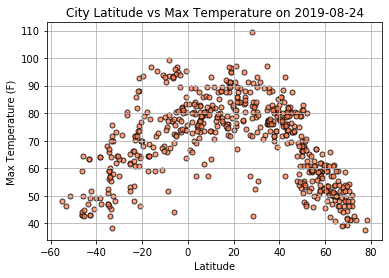

In [5]:
TodayDate = datetime.today().strftime('%Y-%m-%d')
lat_vs_temp_plot = plt.scatter(weather_data_df['Lat'],weather_data_df['Max Temp'],marker='o',c='coral',edgecolor='black',s=25,alpha=0.75)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature on {TodayDate}')
plt.savefig('output_data/lat_vs_temp_plot.png')
plt.show()

#### Latitude vs. Humidity Plot

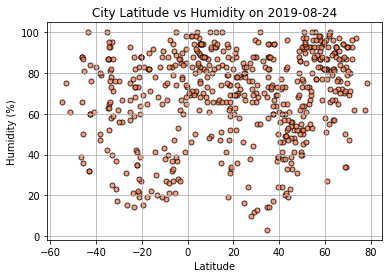

In [6]:
lat_vs_humidity_plot = plt.scatter(weather_data_df['Lat'],weather_data_df['Humidity'],marker='o',c='coral',edgecolor='black',s=25,alpha=0.75)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity on {TodayDate}')
plt.savefig('output_data/lat_vs_humidity_plot.png')
plt.show()

#### Latitude vs. Cloudiness Plot

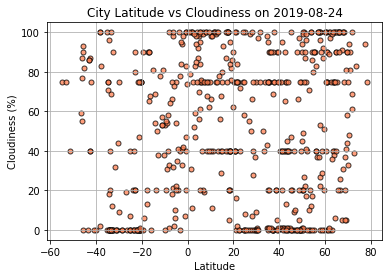

In [7]:
lat_vs_cloudiness_plot = plt.scatter(weather_data_df['Lat'],weather_data_df['Cloudiness'],marker='o',c='coral',edgecolor='black',s=25,alpha=0.75)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness on {TodayDate}')
plt.savefig('output_data/lat_vs_cloudiness_plot.png')
plt.show()

#### Latitude vs. Wind Speed Plot

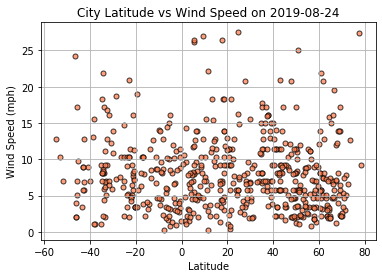

In [8]:
lat_vs_wind_plot = plt.scatter(weather_data_df['Lat'],weather_data_df['Wind Speed'],marker='o',c='coral',edgecolor='black',s=25,alpha=0.75)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed on {TodayDate}')
plt.savefig('output_data/lat_vs_wind_plot.png')
plt.show()

Trend 1: As seen in the latitude vs max temp plot, lower latitudes have higher temperatures, and higher latitudes have lower temperatures.  This is because higher latitude areas receive the sun's rays at a lower angle, causing the same amount of light energy to be spread across a wider area.

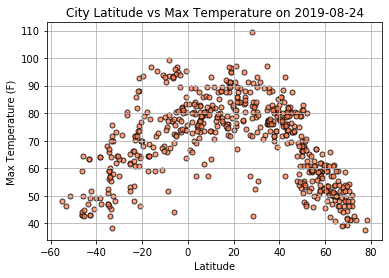

In [9]:
lat_vs_temp_plot = plt.scatter(weather_data_df['Lat'],weather_data_df['Max Temp'],marker='o',c='coral',edgecolor='black',s=25,alpha=0.75)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature on {TodayDate}')
plt.show()

Trend 2: As also seen in the latitude vs max temp plot, the highest temperatures are centered around 20 degrees latitude, not zero. This is because it is currently summer in the northern hemisphere, which means that the tilt of the earth causes the north to more directly face the sun, so temperatures are higher in the north even holding the absolute latitude level constant.

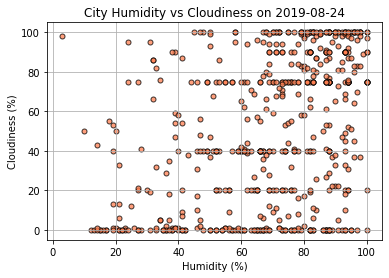

In [10]:
lat_vs_cloudiness_plot = plt.scatter(weather_data_df['Humidity'],weather_data_df['Cloudiness'],marker='o',c='coral',edgecolor='black',s=25,alpha=0.75)
plt.grid()
plt.xlabel('Humidity (%)')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Humidity vs Cloudiness on {TodayDate}')
plt.show()

Trend 3: One can see that higher cloudiness tends to occur with higher humidity.  This is because clouds are made of water droplets in the air, and humidity measures the moisture in the air- so there should be a correlation.